# Loan Defaulter Prediction

### Problem Statement

A Financial institution in India wants to leverage Machine Learning techniques to determine the client’s loan repayment abilities and take proactive steps to reduce the magnitude of exposure to default.
Goal: The goal of the problem is to predict whether a client will default on the vehicle loan payment or not, given the recent data of all the loan transactions. This can help the institution to distinguish the future applicants who might default. For each ID in the Test Dataset, you must predict the “Default” level
Note: Please answer the below descriptive question in the Jupyter Notebook Itself. This is going to carry more weightage in the final evaluation. This is an open-ended question and you are free to come up with a detailed explanation basis the analysis, model building exercise you have carried out.

    
 Mechanism to decide whether to approve or decline the prospect for the loan they are applying for.

Ans: 
    
    We have built the best model xgboost to predict the defaulters with a f1 score of 0.2667529945 now the financial institution can use it in the backend code of an app to predict the defaulters.
    the below flow can be used
    
    New loan data taken from an app
    |
    SQL transformations
    |
    fill missing values
    |
    Normalize
    |
    Prediction <------ Loan prediction XGBoost 
    |
    Filtering and matching
    |
    Write

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

### Loading the dataset

In [2]:
train_df=pd.read_csv('Train_Set_TVS.csv')

### Checking the shape

In [3]:
train_df.shape

(132440, 33)

### Checking the head of the data

In [4]:
train_df.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,...,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,...,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,...,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,...,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,...,North,32.0,16.0,Yes,Yes,NaN,0.200,2339.0,6.0,0.0


## Data Preprocessing of Train data

### Checking the data info

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  132440 non-null  int64  
 1   Compensation        126198 non-null  float64
 2   Vehicle_Status      123336 non-null  object 
 3   Loan_amt            132440 non-null  float64
 4   Annuity_amt         127829 non-null  float64
 5   density_Ind         127024 non-null  float64
 6   Job_Type            122192 non-null  object 
 7   Default_hist        132440 non-null  object 
 8   Prop_List           130475 non-null  object 
 9   Home_Appliances     121476 non-null  float64
 10  Region_Type         132440 non-null  object 
 11  Credit_Inq          129750 non-null  object 
 12  Education_det       132440 non-null  object 
 13  Marital_Stat        132440 non-null  object 
 14  Gen                 132440 non-null  object 
 15  Credit_Lnks         132440 non-nul

#### Total 33 variables we have , 17 categorical , and 16 numerical and company rating , home appliance , dependent and default are categorised as float64 instead of object type

### Converting incorrect data type to correct type

In [6]:
train_df['Company_Rating']=train_df['Company_Rating'].astype("object")

In [7]:
train_df['Dependents']=train_df['Dependents'].astype("object")

In [8]:
train_df['Default']=train_df['Default'].astype("object")

### Checking description of the data

In [9]:
train_df.describe(include="all")

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
count,132440.000000,1.261980e+05,123336,1.324400e+05,127829.000000,127024.000000,122192,132440,130475,121476.000000,...,132440,132440.00000,132440.000000,132440,132440,114927.000000,119119.000000,124287.000000,132440.000000,132440.0
unique,NaN,NaN,2,NaN,NaN,NaN,3,2,3,NaN,...,4,NaN,NaN,2,2,NaN,NaN,NaN,NaN,2.0
top,NaN,NaN,N,NaN,NaN,NaN,IT,ndf,One,NaN,...,North,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,0.0
freq,NaN,NaN,81370,NaN,NaN,NaN,66982,119170,91559,NaN,...,53101,NaN,NaN,122098,108616,NaN,NaN,NaN,NaN,97436.0
mean,488938.279319,7.450519e+05,NaN,4.148011e+05,10845.286442,0.020446,NaN,NaN,NaN,3.220891,...,NaN,43.93326,12.060865,NaN,NaN,0.505929,0.506181,979.451383,3.387738,NaN
std,58568.207772,4.702762e+05,NaN,2.746788e+05,2061.529355,0.015077,NaN,NaN,NaN,1.241751,...,NaN,11.96270,3.566714,NaN,NaN,0.268665,0.268716,829.632194,2.173246,NaN
min,387652.000000,1.527280e+05,NaN,3.427500e+04,5852.100000,0.000100,NaN,NaN,NaN,1.000000,...,NaN,21.00000,0.000000,NaN,NaN,0.000000,0.000000,10.000000,0.000000,NaN
25%,438095.500000,5.177060e+05,NaN,2.045300e+05,9348.370000,0.010400,NaN,NaN,NaN,2.000000,...,NaN,34.00000,10.000000,NaN,NaN,0.268000,0.268000,288.000000,2.000000,NaN
50%,488952.500000,6.659960e+05,NaN,3.495425e+05,10773.820000,0.020400,NaN,NaN,NaN,4.000000,...,NaN,43.00000,12.000000,NaN,NaN,0.500000,0.500000,770.000000,3.000000,NaN
75%,539702.000000,8.794890e+05,NaN,5.582050e+05,12165.390000,0.030400,NaN,NaN,NaN,4.000000,...,NaN,54.00000,15.000000,NaN,NaN,0.769000,0.769000,1589.000000,5.000000,NaN


### Missing value

### Missing value count in each variable

In [10]:
train_df.isnull().sum()

ID                        0
Compensation           6242
Vehicle_Status         9104
Loan_amt                  0
Annuity_amt            4611
density_Ind            5416
Job_Type              10248
Default_hist              0
Prop_List              1965
Home_Appliances       10964
Region_Type               0
Credit_Inq             2690
Education_det             0
Marital_Stat              0
Gen                       0
Credit_Lnks               0
Experience            21845
Income_Alt             7682
Day_Process               0
Ph.No                     0
Type_Loan                 0
Dependents                0
Company_Rating        11731
Region                    0
Age                       0
hour_Process              0
Addr_permanent            0
Permanent_Addr_tag        0
c1_rated              17513
c2_rated              13321
Contact_age            8153
Product_bought            0
Default                   0
dtype: int64

### Percentage of missing values in each variable

In [11]:
train_df.isnull().sum().sort_values(ascending=False)/len(train_df)

Experience            0.164943
c1_rated              0.132233
c2_rated              0.100581
Company_Rating        0.088576
Home_Appliances       0.082785
Job_Type              0.077378
Vehicle_Status        0.068741
Contact_age           0.061560
Income_Alt            0.058004
Compensation          0.047131
density_Ind           0.040894
Annuity_amt           0.034816
Credit_Inq            0.020311
Prop_List             0.014837
Dependents            0.000000
Permanent_Addr_tag    0.000000
Addr_permanent        0.000000
hour_Process          0.000000
Age                   0.000000
Region                0.000000
Product_bought        0.000000
ID                    0.000000
Type_Loan             0.000000
Ph.No                 0.000000
Day_Process           0.000000
Credit_Lnks           0.000000
Gen                   0.000000
Marital_Stat          0.000000
Education_det         0.000000
Region_Type           0.000000
Default_hist          0.000000
Loan_amt              0.000000
Default 

### Dropping the unnecessary column

In [12]:
train_df.drop(['ID','Contact_age','hour_Process','Ph.No','Day_Process','Home_Appliances'],axis=1,inplace=True)

### Imputing missing values

In [13]:
for i in train_df.columns:
    if (train_df[i].dtype=='object'):
        train_df[i].fillna(train_df[i].mode()[0], inplace=True)
    elif (train_df[i].dtype=='float64' or train_df[i].dtype=='int64'):
        train_df[i].fillna(train_df[i].median(), inplace=True)

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Compensation        132440 non-null  float64
 1   Vehicle_Status      132440 non-null  object 
 2   Loan_amt            132440 non-null  float64
 3   Annuity_amt         132440 non-null  float64
 4   density_Ind         132440 non-null  float64
 5   Job_Type            132440 non-null  object 
 6   Default_hist        132440 non-null  object 
 7   Prop_List           132440 non-null  object 
 8   Region_Type         132440 non-null  object 
 9   Credit_Inq          132440 non-null  object 
 10  Education_det       132440 non-null  object 
 11  Marital_Stat        132440 non-null  object 
 12  Gen                 132440 non-null  object 
 13  Credit_Lnks         132440 non-null  object 
 14  Experience          132440 non-null  float64
 15  Income_Alt          132440 non-nul

### After imputation our variable has changed to float type again so now we have to convert it to object type again

In [15]:
train_df['Company_Rating']=train_df['Company_Rating'].astype("object")

In [16]:
train_df['Dependents']=train_df['Dependents'].astype("object")

In [17]:
train_df['Default']=train_df['Default'].astype("object")

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Compensation        132440 non-null  float64
 1   Vehicle_Status      132440 non-null  object 
 2   Loan_amt            132440 non-null  float64
 3   Annuity_amt         132440 non-null  float64
 4   density_Ind         132440 non-null  float64
 5   Job_Type            132440 non-null  object 
 6   Default_hist        132440 non-null  object 
 7   Prop_List           132440 non-null  object 
 8   Region_Type         132440 non-null  object 
 9   Credit_Inq          132440 non-null  object 
 10  Education_det       132440 non-null  object 
 11  Marital_Stat        132440 non-null  object 
 12  Gen                 132440 non-null  object 
 13  Credit_Lnks         132440 non-null  object 
 14  Experience          132440 non-null  float64
 15  Income_Alt          132440 non-nul

In [19]:
print("% of missing value in the train data set is",  train_df.isnull().sum().sum()/len(train_df) , "all missing values have been imputed")

% of missing value in the train data set is 0.0 all missing values have been imputed


### Separating the categorical and numerical variables 

In [20]:
categorical = []
for col, value in train_df.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

In [21]:
categorical

['Vehicle_Status',
 'Job_Type',
 'Default_hist',
 'Prop_List',
 'Region_Type',
 'Credit_Inq',
 'Education_det',
 'Marital_Stat',
 'Gen',
 'Credit_Lnks',
 'Income_Alt',
 'Type_Loan',
 'Dependents',
 'Company_Rating',
 'Region',
 'Addr_permanent',
 'Permanent_Addr_tag',
 'Default']

In [22]:
numerical = train_df.columns.difference(categorical)
df_train_num = train_df[numerical]

### Preprocessing of Numerical variables

### Outlier check

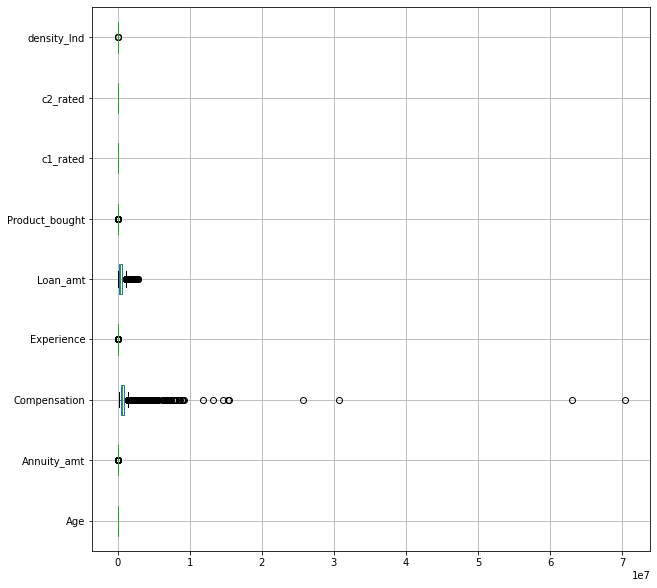

In [23]:
plt.figure(figsize=(10,10))
df_train_num.boxplot(vert=0)
plt.show()

In [24]:
print("There are outliers")

There are outliers


### Outlier treatment

In [25]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [26]:
for column in df_train_num.columns:
    lr,ur=remove_outlier(df_train_num[column])
    df_train_num[column]=np.where(df_train_num[column]>ur,ur,df_train_num[column])
    df_train_num[column]=np.where(df_train_num[column]<lr,lr,df_train_num[column])

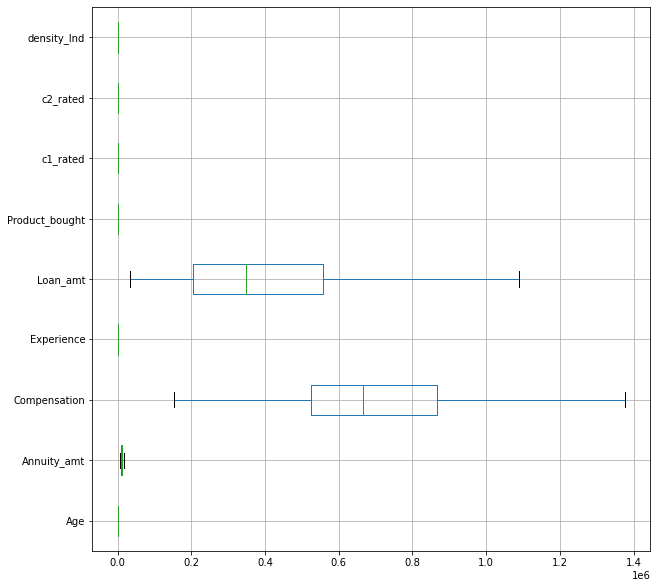

In [27]:
plt.figure(figsize=(10,10))
df_train_num.boxplot(vert=0)
plt.show()

In [28]:
print("Outlier have been treated but there seems to be a need of scaling as Loan amount and compensation are with very high values compared to other variables")

Outlier have been treated but there seems to be a need of scaling as Loan amount and compensation are with very high values compared to other variables


### Scaling of Numerical variables

In [29]:
#df_train_num=df_train_num.apply(zscore)

In [30]:
df_train_num= df_train_num.apply(lambda x:(x-x.min()) / (x.max()-x.min()))

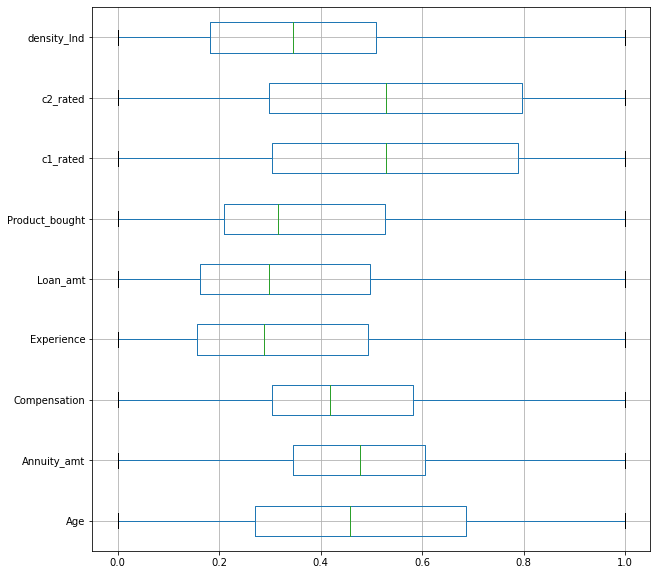

In [31]:
plt.figure(figsize=(10,10))
df_train_num.boxplot(vert=0)
plt.show()

###  Encoding the categorical data

In [32]:
df_train_cat = train_df[categorical]
df_train_cat = df_train_cat.drop(['Default'], axis=1) # Dropping the target column

In [33]:
df_train_cat.shape

(132440, 17)

In [34]:
df_train_cat = pd.get_dummies(df_train_cat)
df_train_cat.shape

(132440, 53)

### Creating the final train dataset

In [35]:
df_train_final = pd.concat([df_train_num, df_train_cat], axis=1)

In [36]:
df_train_final.head()

,Age,Annuity_amt,Compensation,Experience,Loan_amt,Product_bought,c1_rated,c2_rated,density_Ind,Vehicle_Status_N,...,Company_Rating_2.0,Company_Rating_3.0,Region_Central,Region_East,Region_North,Region_South,Addr_permanent_No,Addr_permanent_Yes,Permanent_Addr_tag_No,Permanent_Addr_tag_Yes
0,0.520833,0.772542,0.530361,0.05625,0.591559,0.210526,0.081309,0.081309,0.516184,0,...,1,0,0,1,0,0,0,1,1,0
1,0.520833,0.516128,0.597663,0.18750,0.155343,0.421053,0.194298,0.194298,0.328790,1,...,0,0,0,0,1,0,0,1,0,1
2,0.750000,0.246213,0.107353,0.28750,0.063333,0.421053,0.568110,0.568110,0.199319,1,...,0,1,0,0,1,0,0,1,0,1
3,0.375000,0.129206,0.154541,0.29375,0.137260,0.421053,0.527983,0.592397,0.633731,1,...,1,0,0,0,0,1,0,1,0,1
4,0.229167,0.713979,0.904604,0.43125,0.511588,0.631579,0.527983,0.211193,0.233390,0,...,0,0,0,0,1,0,0,1,0,1


In [37]:
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 62 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       132440 non-null  float64
 1   Annuity_amt               132440 non-null  float64
 2   Compensation              132440 non-null  float64
 3   Experience                132440 non-null  float64
 4   Loan_amt                  132440 non-null  float64
 5   Product_bought            132440 non-null  float64
 6   c1_rated                  132440 non-null  float64
 7   c2_rated                  132440 non-null  float64
 8   density_Ind               132440 non-null  float64
 9   Vehicle_Status_N          132440 non-null  uint8  
 10  Vehicle_Status_Y          132440 non-null  uint8  
 11  Job_Type_Govt.            132440 non-null  uint8  
 12  Job_Type_IT               132440 non-null  uint8  
 13  Job_Type_Non-IT           132440 non-null  u

In [38]:
df_train_final.shape

(132440, 62)

### Checking the target variable classes

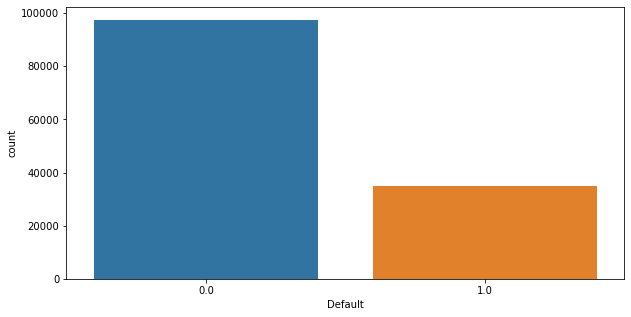

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(data=train_df,x='Default')
plt.show()

In [40]:
train_df["Default"].value_counts()

0.0    97436
1.0    35004
Name: Default, dtype: int64

In [41]:
print("There is a data imbalance problem here")

There is a data imbalance problem here


### Creating x_train and y_train

In [42]:
x_train=df_train_final #independent variables
y_train=train_df['Default'].astype('int') #dependent variables

In [43]:
x_train.shape

(132440, 62)

In [44]:
y_train.shape

(132440,)

### SMOTE

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
oversampled = SMOTE(random_state=0)
x_train_smote, y_train_smote = oversampled.fit_resample(x_train, y_train)

## Data Preprocessing of Test data

In [47]:
test_df=pd.read_csv('Test_Set_TVS.csv')

### Checking the data info

In [48]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56760 entries, 0 to 56759
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  56760 non-null  int64  
 1   Compensation        54010 non-null  float64
 2   Vehicle_Status      52877 non-null  object 
 3   Loan_amt            56760 non-null  float64
 4   Annuity_amt         54797 non-null  float64
 5   density_Ind         54485 non-null  float64
 6   Job_Type            52440 non-null  object 
 7   Default_hist        56760 non-null  object 
 8   Prop_List           55849 non-null  object 
 9   Home_Appliances     52001 non-null  float64
 10  Region_Type         56760 non-null  object 
 11  Credit_Inq          55594 non-null  object 
 12  Education_det       56760 non-null  object 
 13  Marital_Stat        56760 non-null  object 
 14  Gen                 56760 non-null  object 
 15  Credit_Lnks         56760 non-null  object 
 16  Expe

In [49]:
test_df.describe(include="all")

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
count,56760.000000,5.401000e+04,52877,5.676000e+04,54797.000000,54485.000000,52440,56760,55849,52001.000000,...,51707.000000,56760,56760.000000,56760.000000,56760,56760,49397.000000,51105.000000,53238.00000,56760.000000
unique,NaN,NaN,2,NaN,NaN,NaN,3,2,3,NaN,...,NaN,4,NaN,NaN,2,2,NaN,NaN,NaN,NaN
top,NaN,NaN,N,NaN,NaN,NaN,IT,ndf,One,NaN,...,NaN,North,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN
freq,NaN,NaN,34721,NaN,NaN,NaN,28792,51070,39222,NaN,...,NaN,22855,NaN,NaN,52441,46600,NaN,NaN,NaN,NaN
mean,489156.967089,7.423110e+05,NaN,4.145631e+05,10832.334840,0.020465,NaN,NaN,NaN,3.220688,...,2.028487,NaN,43.944327,12.079299,NaN,NaN,0.505408,0.506154,971.82118,3.399683
std,58459.598434,3.764809e+05,NaN,2.759849e+05,2060.269444,0.016790,NaN,NaN,NaN,1.240932,...,0.505052,NaN,11.979557,3.554178,NaN,NaN,0.268413,0.268316,825.51022,2.174527
min,387653.000000,1.483300e+05,NaN,3.477750e+04,6061.610000,0.000000,NaN,NaN,NaN,1.000000,...,1.000000,NaN,21.000000,0.000000,NaN,NaN,0.000000,0.000000,10.00000,0.000000
25%,438878.000000,5.162055e+05,NaN,2.035587e+05,9344.360000,0.010400,NaN,NaN,NaN,2.000000,...,2.000000,NaN,34.000000,10.000000,NaN,NaN,0.268000,0.269000,284.00000,2.000000
50%,488939.500000,6.667440e+05,NaN,3.488628e+05,10756.450000,0.020300,NaN,NaN,NaN,4.000000,...,2.000000,NaN,43.000000,12.000000,NaN,NaN,0.431000,0.500000,767.00000,3.000000
75%,539700.500000,8.770300e+05,NaN,5.598608e+05,12142.340000,0.030500,NaN,NaN,NaN,4.000000,...,2.000000,NaN,54.000000,15.000000,NaN,NaN,0.769000,0.769000,1579.00000,5.000000


### Dropping the ID column

In [50]:
test_df.drop(['ID','Contact_age','hour_Process','Ph.No','Day_Process','Home_Appliances'],axis=1,inplace=True)

### Converting incorrect data type to correct type

In [51]:
test_df['Company_Rating']=test_df['Company_Rating'].astype("object")

In [52]:
test_df['Dependents']=test_df['Dependents'].astype("object")

In [53]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56760 entries, 0 to 56759
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Compensation        54010 non-null  float64
 1   Vehicle_Status      52877 non-null  object 
 2   Loan_amt            56760 non-null  float64
 3   Annuity_amt         54797 non-null  float64
 4   density_Ind         54485 non-null  float64
 5   Job_Type            52440 non-null  object 
 6   Default_hist        56760 non-null  object 
 7   Prop_List           55849 non-null  object 
 8   Region_Type         56760 non-null  object 
 9   Credit_Inq          55594 non-null  object 
 10  Education_det       56760 non-null  object 
 11  Marital_Stat        56760 non-null  object 
 12  Gen                 56760 non-null  object 
 13  Credit_Lnks         56760 non-null  object 
 14  Experience          47409 non-null  float64
 15  Income_Alt          53461 non-null  object 
 16  Type

### Missing value

### Missing value count in each variable

In [54]:
test_df.isnull().sum()

Compensation          2750
Vehicle_Status        3883
Loan_amt                 0
Annuity_amt           1963
density_Ind           2275
Job_Type              4320
Default_hist             0
Prop_List              911
Region_Type              0
Credit_Inq            1166
Education_det            0
Marital_Stat             0
Gen                      0
Credit_Lnks              0
Experience            9351
Income_Alt            3299
Type_Loan                0
Dependents               0
Company_Rating        5053
Region                   0
Age                      0
Addr_permanent           0
Permanent_Addr_tag       0
c1_rated              7363
c2_rated              5655
Product_bought           0
dtype: int64

### Percentage of missing values in each variable

In [55]:
test_df.isnull().sum().sort_values(ascending=False)/len(test_df)

Experience            0.164746
c1_rated              0.129722
c2_rated              0.099630
Company_Rating        0.089024
Job_Type              0.076110
Vehicle_Status        0.068411
Income_Alt            0.058122
Compensation          0.048450
density_Ind           0.040081
Annuity_amt           0.034584
Credit_Inq            0.020543
Prop_List             0.016050
Dependents            0.000000
Addr_permanent        0.000000
Age                   0.000000
Region                0.000000
Permanent_Addr_tag    0.000000
Credit_Lnks           0.000000
Type_Loan             0.000000
Gen                   0.000000
Marital_Stat          0.000000
Education_det         0.000000
Region_Type           0.000000
Default_hist          0.000000
Loan_amt              0.000000
Product_bought        0.000000
dtype: float64

### Imputing the missing value

In [56]:
for i in test_df.columns:
    if (test_df[i].dtype=='object'):
        test_df[i].fillna(test_df[i].mode()[0], inplace=True)
    elif (test_df[i].dtype=='float64' or test_df[i].dtype=='int64'):
        test_df[i].fillna(test_df[i].median(), inplace=True)

In [57]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56760 entries, 0 to 56759
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Compensation        56760 non-null  float64
 1   Vehicle_Status      56760 non-null  object 
 2   Loan_amt            56760 non-null  float64
 3   Annuity_amt         56760 non-null  float64
 4   density_Ind         56760 non-null  float64
 5   Job_Type            56760 non-null  object 
 6   Default_hist        56760 non-null  object 
 7   Prop_List           56760 non-null  object 
 8   Region_Type         56760 non-null  object 
 9   Credit_Inq          56760 non-null  object 
 10  Education_det       56760 non-null  object 
 11  Marital_Stat        56760 non-null  object 
 12  Gen                 56760 non-null  object 
 13  Credit_Lnks         56760 non-null  object 
 14  Experience          56760 non-null  float64
 15  Income_Alt          56760 non-null  object 
 16  Type

### We have to convert the incorrect data types again after missing value imputation

In [58]:
test_df['Company_Rating']=test_df['Company_Rating'].astype("object")

In [59]:
test_df['Dependents']=test_df['Dependents'].astype("object")

In [60]:
print("% of missing value in the test data set is",  test_df.isnull().sum().sum()/len(test_df) , "all missing values have been imputed")

% of missing value in the test data set is 0.0 all missing values have been imputed


### Separating the categorical and numerical variables

In [61]:
categorical = []
for col, value in test_df.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

In [62]:
categorical

['Vehicle_Status',
 'Job_Type',
 'Default_hist',
 'Prop_List',
 'Region_Type',
 'Credit_Inq',
 'Education_det',
 'Marital_Stat',
 'Gen',
 'Credit_Lnks',
 'Income_Alt',
 'Type_Loan',
 'Dependents',
 'Company_Rating',
 'Region',
 'Addr_permanent',
 'Permanent_Addr_tag']

In [63]:
numerical = test_df.columns.difference(categorical)
df_test_num = test_df[numerical]

### Preprocessing of Numerical variables

### Outlier check

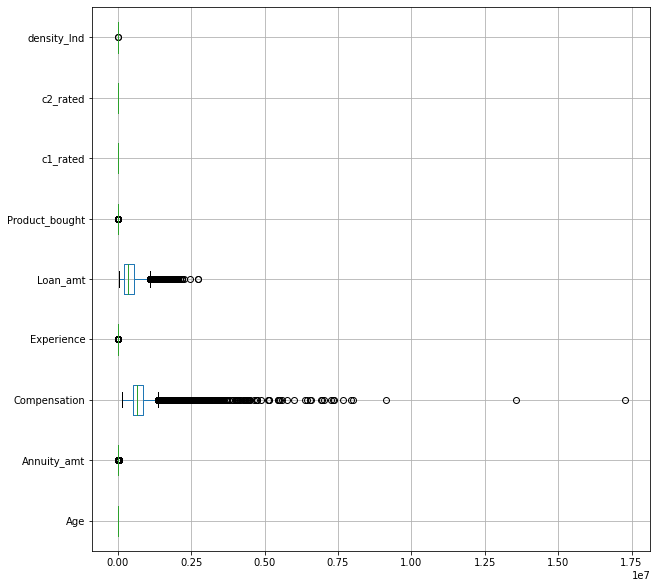

In [64]:
plt.figure(figsize=(10,10))
df_test_num.boxplot(vert=0)
plt.show()

In [65]:
print("There are outliers present")

There are outliers present


### Outlier Treatment

In [66]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [67]:
for column in df_test_num.columns:
    lr,ur=remove_outlier(df_test_num[column])
    df_test_num[column]=np.where(df_test_num[column]>ur,ur,df_test_num[column])
    df_test_num[column]=np.where(df_test_num[column]<lr,lr,df_test_num[column])

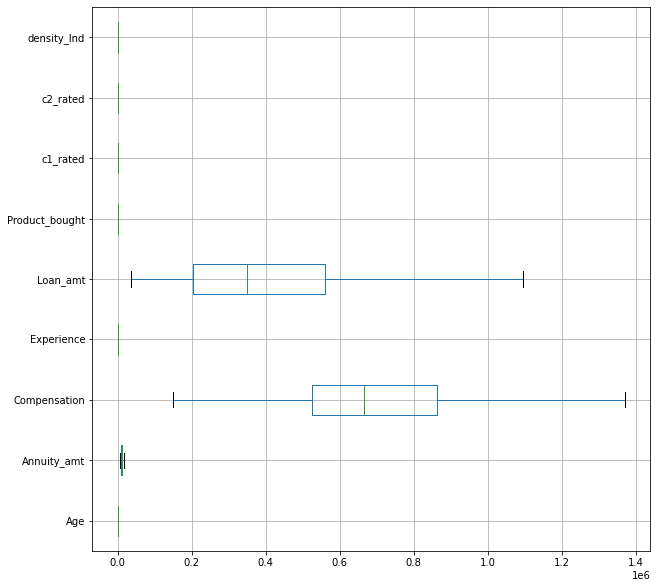

In [68]:
plt.figure(figsize=(10,10))
df_test_num.boxplot(vert=0)
plt.show()

In [69]:
print("Outliers have been treated but as observed from the box plot the scaling is not uniform hence we have to scale the test data")

Outliers have been treated but as observed from the box plot the scaling is not uniform hence we have to scale the test data


### Scaling numerical variables

In [70]:
#df_test_num=df_test_num.apply(zscore)

In [71]:
df_train_num= df_train_num.apply(lambda x:(x-x.min()) / (x.max()-x.min()))

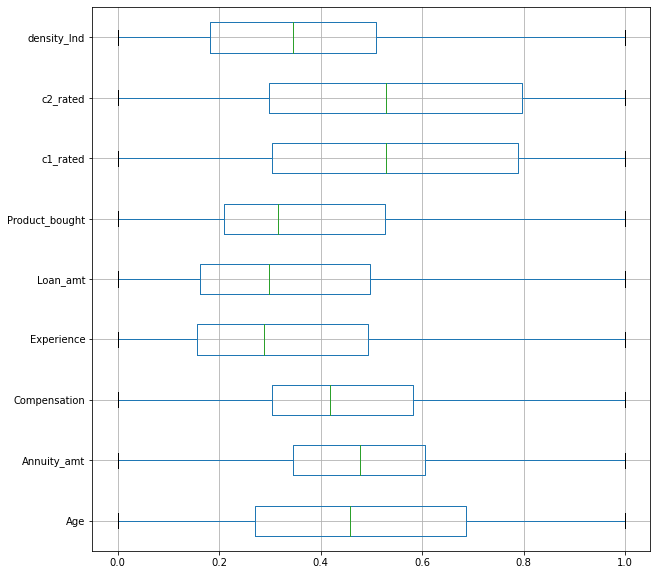

In [72]:
plt.figure(figsize=(10,10))
df_train_num.boxplot(vert=0)
plt.show()

### Encoding the test data

In [73]:
df_test_cat = test_df[categorical]

In [74]:
df_test_cat.shape

(56760, 17)

In [75]:
df_test_cat = pd.get_dummies(df_test_cat)
df_test_cat.shape

(56760, 53)

### Creating the final data set

In [76]:
df_test_final = pd.concat([df_test_num, df_test_cat], axis=1)

In [77]:
df_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56760 entries, 0 to 56759
Data columns (total 62 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       56760 non-null  float64
 1   Annuity_amt               56760 non-null  float64
 2   Compensation              56760 non-null  float64
 3   Experience                56760 non-null  float64
 4   Loan_amt                  56760 non-null  float64
 5   Product_bought            56760 non-null  float64
 6   c1_rated                  56760 non-null  float64
 7   c2_rated                  56760 non-null  float64
 8   density_Ind               56760 non-null  float64
 9   Vehicle_Status_N          56760 non-null  uint8  
 10  Vehicle_Status_Y          56760 non-null  uint8  
 11  Job_Type_Govt.            56760 non-null  uint8  
 12  Job_Type_IT               56760 non-null  uint8  
 13  Job_Type_Non-IT           56760 non-null  uint8  
 14  Defaul

In [78]:
df_test_final.shape

(56760, 62)

### Create x_test 

In [79]:
x_test=df_test_final #independent variables

### XGBoost

In [1]:
from xgboost import XGBClassifier

In [116]:
xgb1=XGBClassifier(random_state=1)
xgb1.fit(x_train_smote,y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [120]:
xgb2=XGBClassifier(n_estimators=300,
                     subsample=0.9,
                            n_jobs=-1,random_state=1)
xgb2.fit(x_train_smote,y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [123]:
xgb3=XGBClassifier(n_estimators=350,
                     subsample=0.9,
                            n_jobs=-1,random_state=1)
xgb3.fit(x_train_smote,y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=350,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [125]:
xgb4=XGBClassifier(n_estimators=350,max_depth=30,
                     subsample=0.9,
                            n_jobs=-1,random_state=1)
xgb4.fit(x_train_smote,y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=30, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=350,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [127]:
xgb5=XGBClassifier(n_estimators=400,
                     subsample=0.9,
                            n_jobs=-1,random_state=1)
xgb5.fit(x_train_smote,y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

### Model Tuning

In [116]:
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline

import xgboost as xgb
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve,roc_auc_score, f1_score, confusion_matrix

In [130]:
from collections import Counter
counter = Counter(y_train_smote)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)
#define the param grid
# Parameters of pipelines can be set using ‘__’ separated para
clf_grid = {
    'xgb__eta': [0.05, 0.1, 0.3],
    'xgb__max_depth': [3, 6, 12],
    'xgb__colsample_bytree': [0.9, 1.0],
    }
#define the pipeline
model_pipe = Pipeline([
    ('xgb', xgb.XGBClassifier(n_estimators=200,
                              n_jobs=-1, scale_pos_weight=estimate))
])
#define the classifer
clf = GridSearchCV(model_pipe,
                   clf_grid,
                   n_jobs=-1,
                   cv=3, 
                   verbose=50, 
                   scoring='roc_auc')
#fit to training data
clf.fit(x_train_smote, y_train_smote)

Estimate: 1.000
Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_rate=N...
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=200,
                                                      n_jobs=-1,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None,
                                                      reg_alpha=None,
                                                      reg_lambda=None, ...))]),
             n_jobs=-1,
             param_grid={'xgb__colsample_bytree': [0.9, 1.0],
                         'xgb__eta': [0.05, 0.1, 0.3],
                         'xgb__max_depth': [3, 6, 12]},
             scoring='roc_auc', verbose=50)

In [131]:
print("Best model parameters: \n")
print(clf.best_params_ )
print("Best model score: \n")
print(clf.best_score_)

Best model parameters: 

{'xgb__colsample_bytree': 0.9, 'xgb__eta': 0.05, 'xgb__max_depth': 12}
Best model score: 

0.8391520682970657


In [136]:
from collections import Counter
counter = Counter(y_train)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)
clf1 = xgb.XGBClassifier(n_estimators=300,
                            subsample=0.9,
                            n_jobs=-1,
                           scale_pos_weight=estimate)
clf1.fit(x_train_smote, y_train_smote)

Estimate: 2.784


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [138]:
xgb6 = XGBClassifier( silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.9,
                      objective='binary:logistic', 
                      n_estimators=300, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10,
                      n_jobs=-1)
xgb6.fit(x_train_smote,y_train_smote)

[22:50:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=10, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.3, reg_lambda=1, ...)

In [140]:
xgb7 = XGBClassifier( scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.9,
                      objective='binary:logistic', 
                      n_estimators=300, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10,
                      n_jobs=-1)
xgb7.fit(x_train_smote,y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=10, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.3, reg_lambda=1, ...)

In [142]:
from collections import Counter
counter = Counter(y_train_smote)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)
clf2 = xgb.XGBClassifier(n_estimators=300,
                            subsample=0.9,
                            n_jobs=-1, max_depth=7,learning_rate=0.01,
                           scale_pos_weight=estimate)
clf2.fit(x_train_smote, y_train_smote)

Estimate: 1.000


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [144]:
from collections import Counter
counter = Counter(y_train_smote)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)
clf3 = xgb.XGBClassifier(n_estimators=400,
                            subsample=0.9,
                            n_jobs=-1,
                           scale_pos_weight=estimate)
clf3.fit(x_train_smote, y_train_smote)

Estimate: 1.000


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [146]:
from collections import Counter
counter = Counter(y_train)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)
clf4 = xgb.XGBClassifier(n_estimators=350,
                            subsample=0.9,
                            n_jobs=-1,
                           scale_pos_weight=estimate)
clf4.fit(x_train_smote, y_train_smote)

Estimate: 2.784


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=350,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [149]:
from collections import Counter
counter = Counter(y_train)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)
clf5 = xgb.XGBClassifier(n_estimators=300,
                            subsample=0.8,
                            n_jobs=-1,
                           scale_pos_weight=estimate)
clf5.fit(x_train_smote, y_train_smote)

Estimate: 2.784


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [282]:
from collections import Counter
counter = Counter(y_train)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)
clf6 = xgb.XGBClassifier(n_estimators=250,
                            subsample=0.9,
                            n_jobs=-1,
                           scale_pos_weight=estimate)
clf6.fit(x_train_smote, y_train_smote)

Estimate: 2.784


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=250,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [154]:
from collections import Counter
counter = Counter(y_train)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)
clf7 = xgb.XGBClassifier(n_estimators=200,
                            subsample=0.9,
                            n_jobs=-1,
                           scale_pos_weight=estimate)
clf7.fit(x_train_smote, y_train_smote)

Estimate: 2.784


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [156]:
from collections import Counter
counter = Counter(y_train)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)
clf8 = xgb.XGBClassifier(n_estimators=230,
                            subsample=0.9,
                            n_jobs=-1,
                           scale_pos_weight=estimate)
clf8.fit(x_train_smote, y_train_smote)

Estimate: 2.784


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=230,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [158]:
from collections import Counter
counter = Counter(y_train)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)
clf9 = xgb.XGBClassifier(n_estimators=270,
                            subsample=0.9,
                            n_jobs=-1,
                           scale_pos_weight=estimate)
clf9.fit(x_train_smote, y_train_smote)

Estimate: 2.784


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=270,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [117]:
from collections import Counter
counter = Counter(y_train)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)
clf10 = xgb.XGBClassifier(n_estimators=290,
                            subsample=0.9,
                            n_jobs=-1,
                           scale_pos_weight=estimate)
clf10.fit(x_train_smote, y_train_smote)

Estimate: 2.784


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=290,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [122]:
from collections import Counter
counter = Counter(y_train)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)
clf11 = xgb.XGBClassifier(n_estimators=260,
                            subsample=0.9,
                            n_jobs=-1,
                           scale_pos_weight=estimate)
clf11.fit(x_train_smote, y_train_smote)

Estimate: 2.784


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=260,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

### SVM

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
SVM1 = SVC(kernel='linear', C=1E10)
SVM1.fit(x_train_smote, y_train_smote)

### Submissions

In [119]:
submit=pd.read_csv("Sample_Submission_TVS.csv")

In [119]:
y_pred30=xgb1.predict(x_test)

my_submission = pd.DataFrame({'ID': submit.ID, 'Default': y_pred30})

my_submission.to_csv('TVS_CREDIT_SUBMISSION-30.csv', index=False) #0.2634501 

In [121]:
y_pred31=xgb2.predict(x_test)

my_submission = pd.DataFrame({'ID': submit.ID, 'Default': y_pred31})

my_submission.to_csv('TVS_CREDIT_SUBMISSION-31.csv', index=False) #0.2651160607 

In [124]:
y_pred32=xgb3.predict(x_test)

my_submission = pd.DataFrame({'ID': submit.ID, 'Default': y_pred32})

my_submission.to_csv('TVS_CREDIT_SUBMISSION-32.csv', index=False) #0.2653494397 

In [126]:
y_pred33=xgb4.predict(x_test)

my_submission = pd.DataFrame({'ID': submit.ID, 'Default': y_pred33})

my_submission.to_csv('TVS_CREDIT_SUBMISSION-33.csv', index=False) #0.2620255263

In [128]:
y_pred34=xgb5.predict(x_test)

my_submission = pd.DataFrame({'ID': submit.ID, 'Default': y_pred34})

my_submission.to_csv('TVS_CREDIT_SUBMISSION-34.csv', index=False) #0.2652291777

In [132]:
y_pred35=clf.predict(x_test)

my_submission = pd.DataFrame({'ID': submit.ID, 'Default': y_pred35})

my_submission.to_csv('TVS_CREDIT_SUBMISSION-35.csv', index=False) #0.2628728478

In [148]:
y_pred36=clf1.predict(x_test)

my_submission = pd.DataFrame({'ID': submit.ID, 'Default': y_pred36})

my_submission.to_csv('TVS_CREDIT_SUBMISSION-36.csv', index=False) #0.2666728304 

In [139]:
y_pred37=xgb6.predict(x_test)

my_submission = pd.DataFrame({'ID': submit.ID, 'Default': y_pred37})

my_submission.to_csv('TVS_CREDIT_SUBMISSION-37.csv', index=False) #0.2572942423

In [141]:
y_pred38=xgb7.predict(x_test)

my_submission = pd.DataFrame({'ID': submit.ID, 'Default': y_pred38})

my_submission.to_csv('TVS_CREDIT_SUBMISSION-38.csv', index=False) #0.2572942423

In [143]:
y_pred39=clf2.predict(x_test)

my_submission = pd.DataFrame({'ID': submit.ID, 'Default': y_pred39})

my_submission.to_csv('TVS_CREDIT_SUBMISSION-39.csv', index=False) #0.2599200093

In [145]:
y_pred40=clf3.predict(x_test)

my_submission = pd.DataFrame({'ID': submit.ID, 'Default': y_pred40})

my_submission.to_csv('TVS_CREDIT_SUBMISSION-40.csv', index=False) #0.2653223667

In [147]:
y_pred41=clf4.predict(x_test)

my_submission = pd.DataFrame({'ID': submit.ID, 'Default': y_pred41})

my_submission.to_csv('TVS_CREDIT_SUBMISSION-41.csv', index=False) #0.2664633301

In [150]:
y_pred42=clf5.predict(x_test)

my_submission = pd.DataFrame({'ID': submit.ID, 'Default': y_pred42})

my_submission.to_csv('TVS_CREDIT_SUBMISSION-42.csv', index=False) #0.2664877951

In [152]:
y_pred43=clf6.predict(x_test)

my_submission = pd.DataFrame({'ID': submit.ID, 'Default': y_pred43})

my_submission.to_csv('TVS_CREDIT_SUBMISSION-43.csv', index=False) #0.2667529945 BEST

In [155]:
y_pred44=clf7.predict(x_test)

my_submission = pd.DataFrame({'ID': submit.ID, 'Default': y_pred44})

my_submission.to_csv('TVS_CREDIT_SUBMISSION-44.csv', index=False) #0.2664506173

In [157]:
y_pred45=clf8.predict(x_test)

my_submission = pd.DataFrame({'ID': submit.ID, 'Default': y_pred45})

my_submission.to_csv('TVS_CREDIT_SUBMISSION-45.csv', index=False) #0.2664898293

In [159]:
y_pred46=clf9.predict(x_test)

my_submission = pd.DataFrame({'ID': submit.ID, 'Default': y_pred46})

my_submission.to_csv('TVS_CREDIT_SUBMISSION-46.csv', index=False) #0.266477588

In [121]:
y_pred47=clf10.predict(x_test)

my_submission = pd.DataFrame({'ID': submit.ID, 'Default': y_pred47})

my_submission.to_csv('TVS_CREDIT_SUBMISSION-47.csv', index=False) #0.266598853

In [123]:
y_pred48=clf11.predict(x_test)

my_submission = pd.DataFrame({'ID': submit.ID, 'Default': y_pred48})

my_submission.to_csv('TVS_CREDIT_SUBMISSION-48.csv', index=False) #0.2664878